# Stationarity Test and Non Stationarity (Unit root) 

In [154]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.api import add_constant
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm
import glob
from statsmodels.tsa.stattools import adfuller

In [360]:
# To avoid processing data that has already been prepared, the combined dataset is re-read from the csv file instead of repeating the previous steps.
Indices= pd.read_excel('C:/Users/Teresa Nguyen/Desktop/Studium/Master/2.Semester FS/AQM/AQM Written Assignment/DATA Refinitiv.xlsx')
Macro_data= pd.read_excel('C:/Users/Teresa Nguyen/Desktop/Studium/Master/2.Semester FS/AQM/AQM Written Assignment/Stationarity Test Macro Data.xlsx')

In [363]:
Indices.dropna()
Indices

,TIMESTAMP,Stoxx,S&P 500,Dow Jones Industria,Bovespa Index,Russell 2000,FTSE 100,Hang Seng Index,NASDAQ-100,DAX,CAC 40
0,2023-04-30,514.237856,4169.48,11270.47,20942.871754,1768.9874,9894.860577,2534.501561,13245.986,17546.482412,8255.642246
1,2023-03-31,496.255108,4109.31,11163.81,20122.494124,1802.4838,9412.256577,2598.905663,13181.351,16940.179278,7936.775816
2,2023-02-28,487.668422,3970.15,11048.13,20037.796704,1896.9910,9467.251638,2520.790919,12042.116,16250.121624,7686.538909
3,2023-01-31,492.277112,4076.60,11419.76,22359.216258,1931.9448,9574.714485,2785.975944,12101.929,16432.340546,7692.931005
4,2022-12-31,454.719606,3839.50,10962.83,20759.477866,1761.2459,9014.383355,2532.993149,10939.762,14901.102312,6928.253425
...,...,...,...,...,...,...,...,...,...,...,...
116,2013-08-31,393.056859,1632.97,5021.61,20961.377258,1010.9000,9945.148334,2802.420530,3073.813,10712.359372,5200.454768
117,2013-07-31,398.441241,1685.73,5242.64,21188.934282,1045.2600,10067.909495,2821.659188,3090.190,11007.035697,5310.275576
118,2013-06-30,370.752901,1606.28,5034.66,21266.919113,977.4800,9453.761446,2682.149764,2909.600,10353.322233,4863.559498
119,2013-05-31,390.991904,1630.74,5093.15,24981.828369,984.1400,10005.000152,2884.621132,2981.760,10849.271633,5131.170974


In [362]:
Macro_data.dropna()
#first two rows were deleted manually because of data inconsistencies 

,TIMESTAMP,CPI,EMP_US,Import in P. US,UNEMP_US,Retail,INT. TRADE,INDST_Prod,MONEY SUPPLY,TREASURY,PROD_Energy,GDP
0,2023-02-28,0.4,248000,0.86,3.6,-0.7,-7.060000e+10,0.95,1.933010e+13,3.95,472357000,2.9
1,2023-01-31,0.5,472000,3.20,3.4,2.8,-6.866000e+10,1.39,1.959000e+13,3.81,459807000,2.9
2,2022-12-31,0.1,239000,2.68,3.5,-0.7,-6.721000e+10,0.58,1.987950e+13,3.87,429561000,2.9
3,2022-11-30,0.2,290000,4.24,3.6,-1.3,-6.065000e+10,1.85,1.996310e+13,4.22,416349000,2.6
4,2022-10-31,0.5,324000,6.08,3.7,1.0,-7.716000e+10,3.10,2.005690e+13,4.28,439438000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
114,2013-08-31,0.2,244000,0.87,7.2,-0.2,-3.662000e+10,2.26,2.537400e+12,3.49,365730000,1.7
115,2013-07-31,0.2,122000,0.07,7.3,0.7,-3.636000e+10,1.26,2.543700e+12,3.31,367883000,1.7
116,2013-06-30,0.2,178000,-1.83,7.5,0.3,-3.443000e+10,1.79,2.523500e+12,3.07,377436000,1.7
117,2013-05-31,0.0,215000,-2.71,7.5,0.6,-4.170000e+10,1.61,2.518500e+12,2.73,392039000,2.5


In [267]:
# Check the dimensionality of the dataset
Indices.shape
Macro_data.shape
print("Dataset has {} records and {} columns".format(Indices.shape[0], Indices.shape[1]))
print("Dataset has {} records and {} columns".format(Macro_data.shape[0], Macro_data.shape[1]))

Dataset has 121 records and 11 columns
Dataset has 119 records and 12 columns


# Plotting the Data

A stationary time series 
- does not have (self-)predictable patterns in the long-term
- does not depend on the time at which the series is observed
- is not driven by a determinstic trend, drift or seasonality effects
- various definitions

First, for Stationarity and non-stationarity test using plots for visualisation

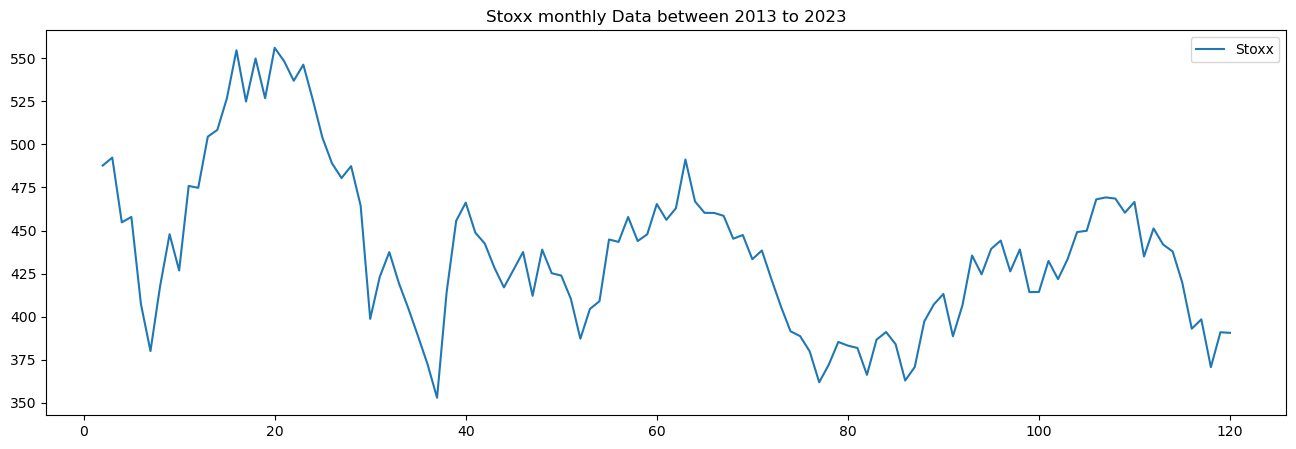

In [96]:
# Define the plot size
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Stoxx'], label = "Stoxx")
plt.legend(loc='best')
plt.title("Stoxx monthly Data between 2013 to 2023")
plt.show()

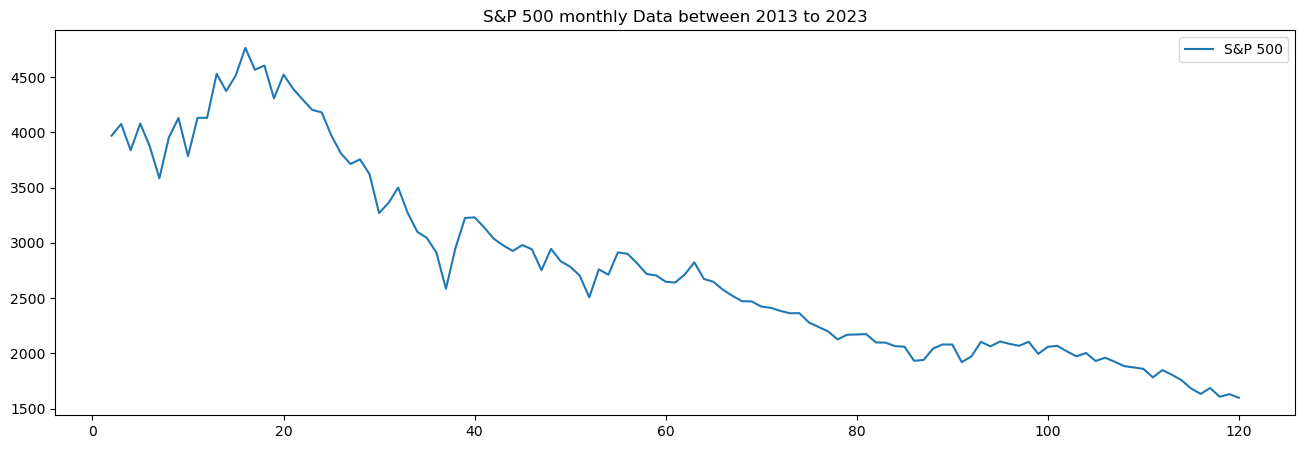

In [25]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['S&P 500'], label = "S&P 500")
plt.legend(loc='best')
plt.title("S&P 500 monthly Data between 2013 to 2023")
plt.show()

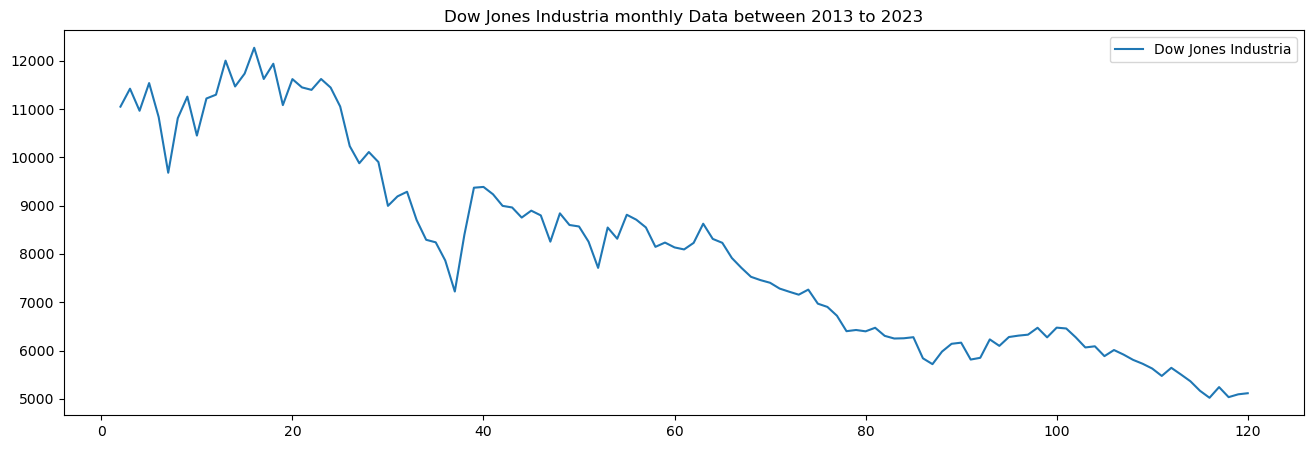

In [26]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Dow Jones Industria'], label = "Dow Jones Industria")
plt.legend(loc='best')
plt.title("Dow Jones Industria monthly Data between 2013 to 2023")
plt.show()

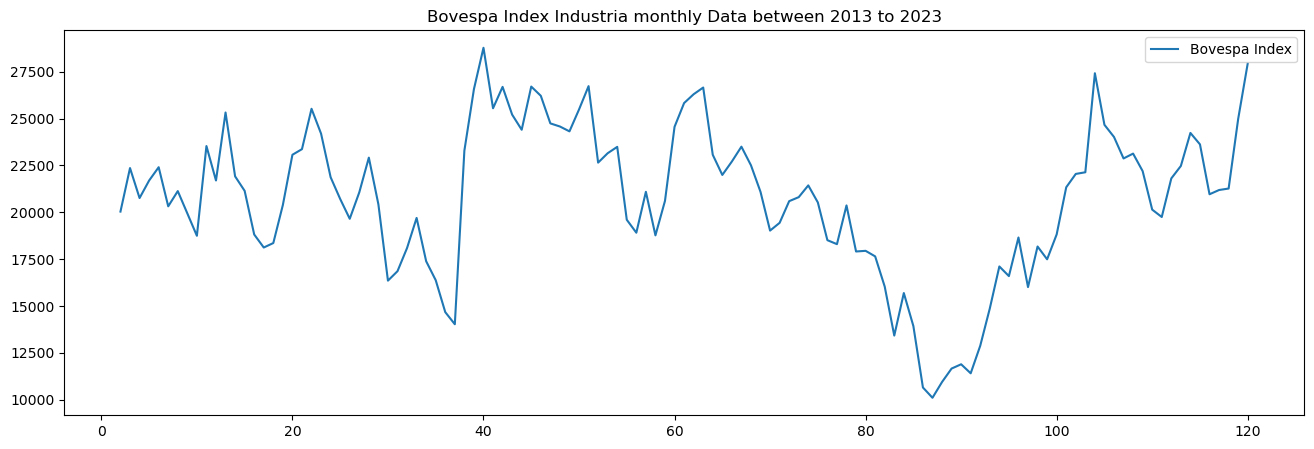

In [27]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Bovespa Index'], label = "Bovespa Index")
plt.legend(loc='best')
plt.title("Bovespa Index Industria monthly Data between 2013 to 2023")
plt.show()

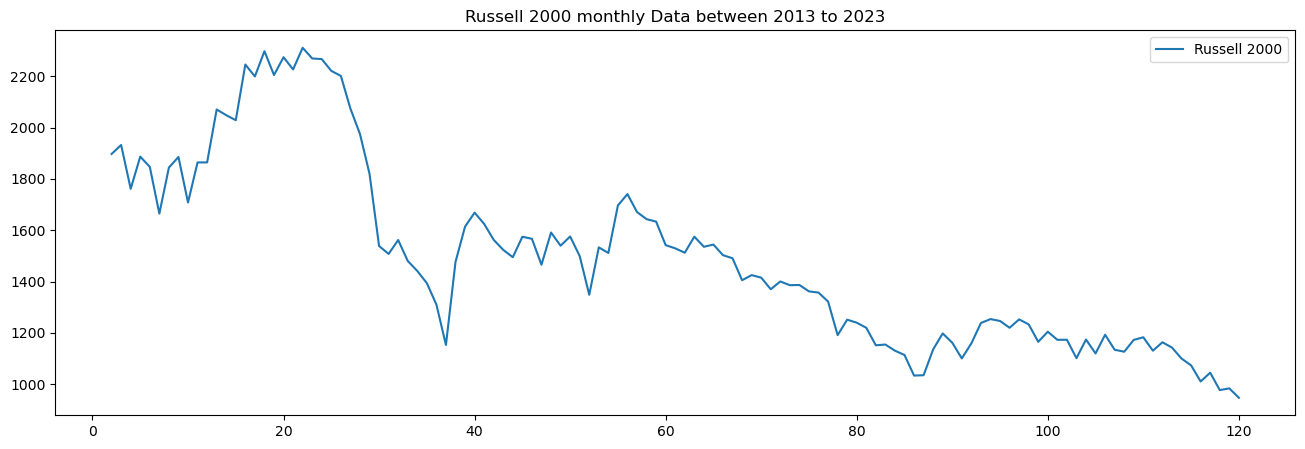

In [28]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Russell 2000'], label = "Russell 2000")
plt.legend(loc='best')
plt.title("Russell 2000 monthly Data between 2013 to 2023")
plt.show()

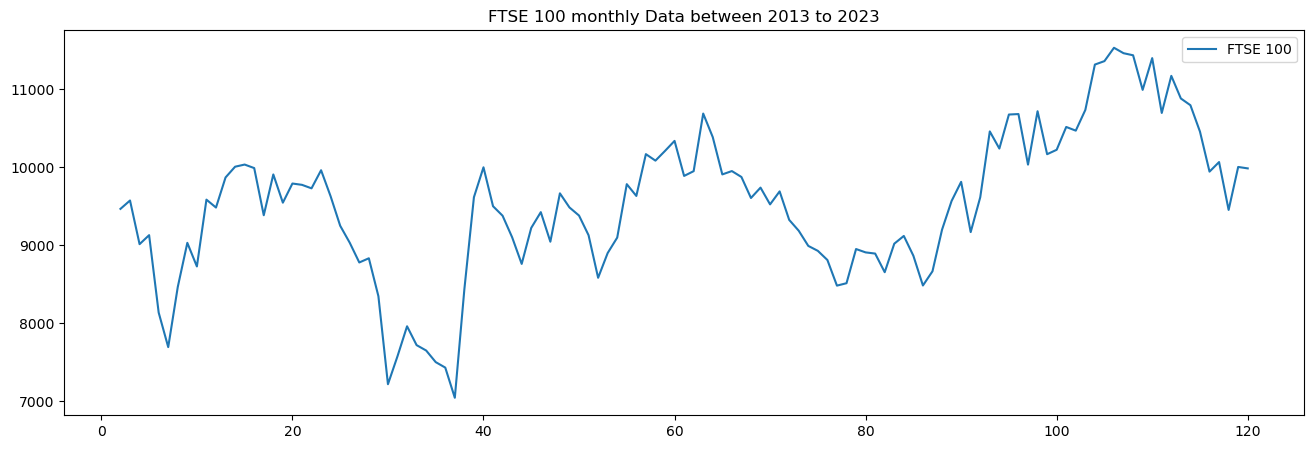

In [29]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['FTSE 100'], label = "FTSE 100")
plt.legend(loc='best')
plt.title("FTSE 100 monthly Data between 2013 to 2023")
plt.show()

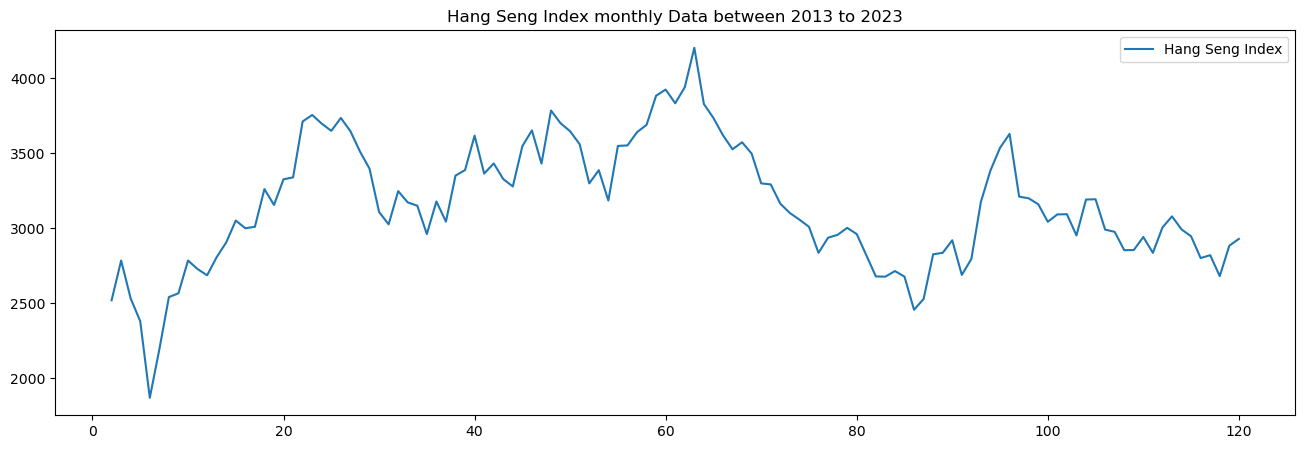

In [30]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Hang Seng Index'], label = "Hang Seng Index")
plt.legend(loc='best')
plt.title("Hang Seng Index monthly Data between 2013 to 2023")
plt.show()

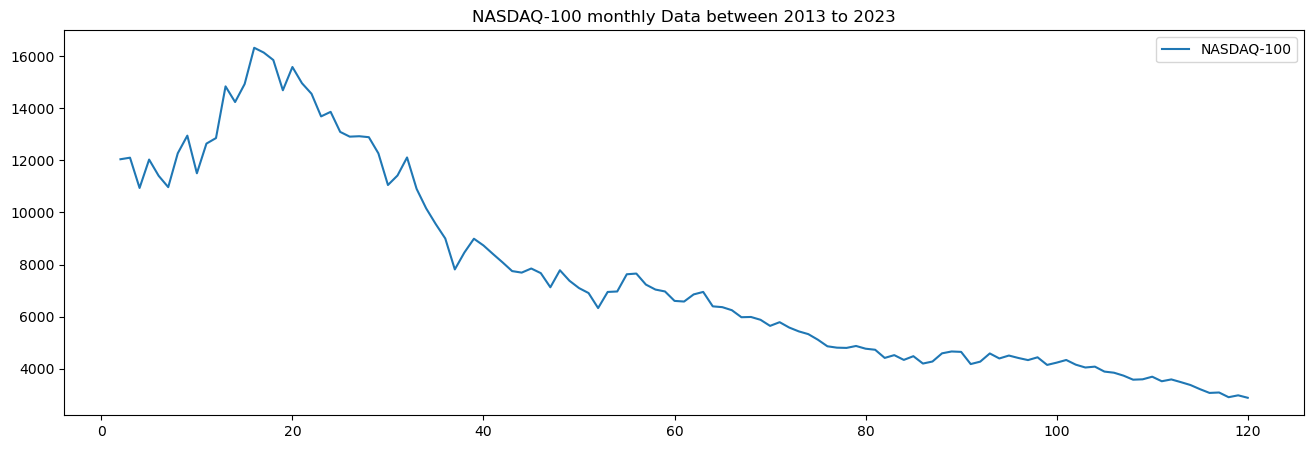

In [31]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['NASDAQ-100'], label = "NASDAQ-100")
plt.legend(loc='best')
plt.title("NASDAQ-100 monthly Data between 2013 to 2023")
plt.show()

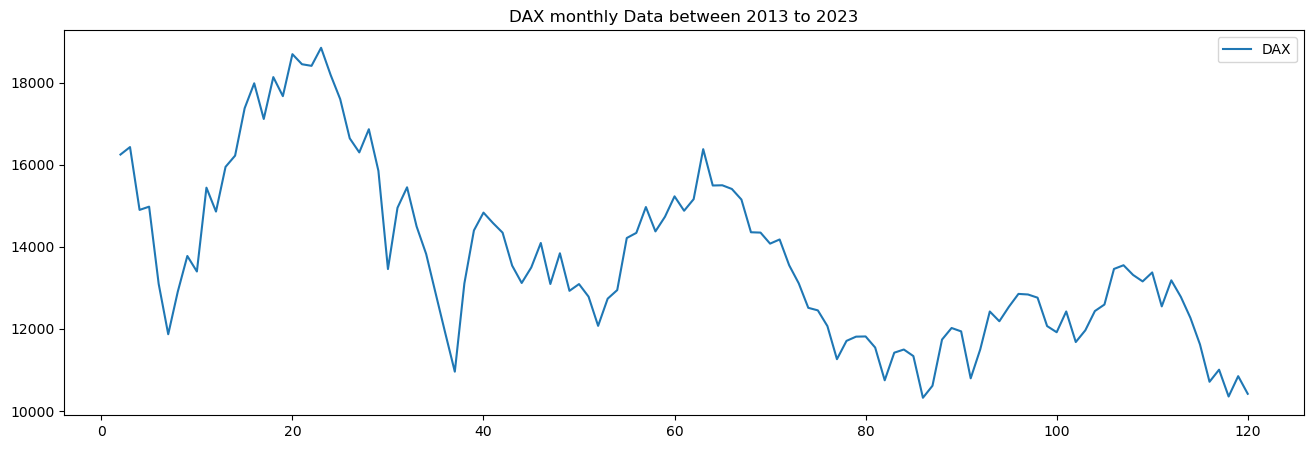

In [32]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['DAX '], label = "DAX")
plt.legend(loc='best')
plt.title("DAX monthly Data between 2013 to 2023")
plt.show()

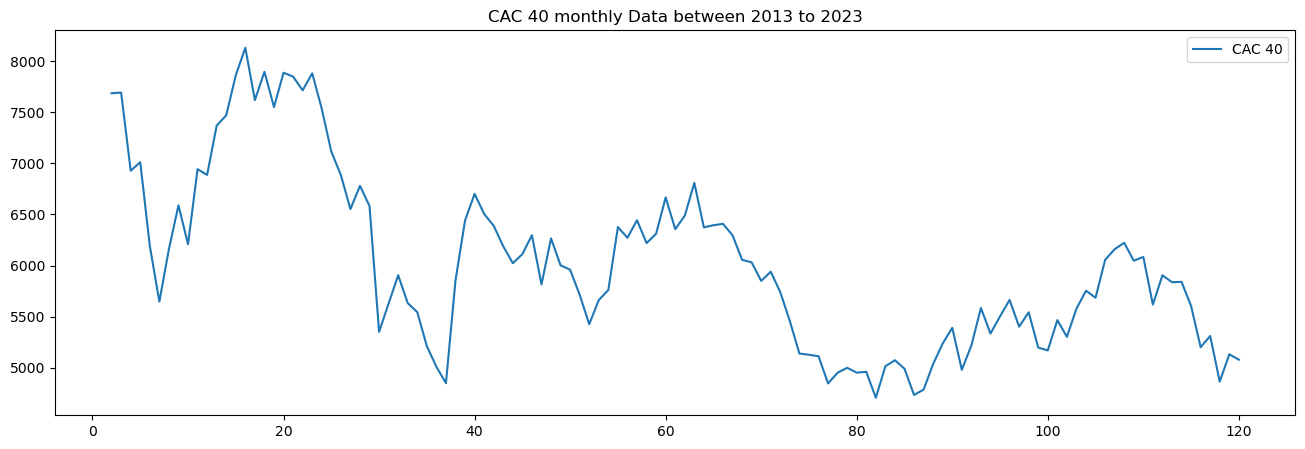

In [33]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['CAC 40'], label = "CAC 40")
plt.legend(loc='best')
plt.title("CAC 40 monthly Data between 2013 to 2023")
plt.show()

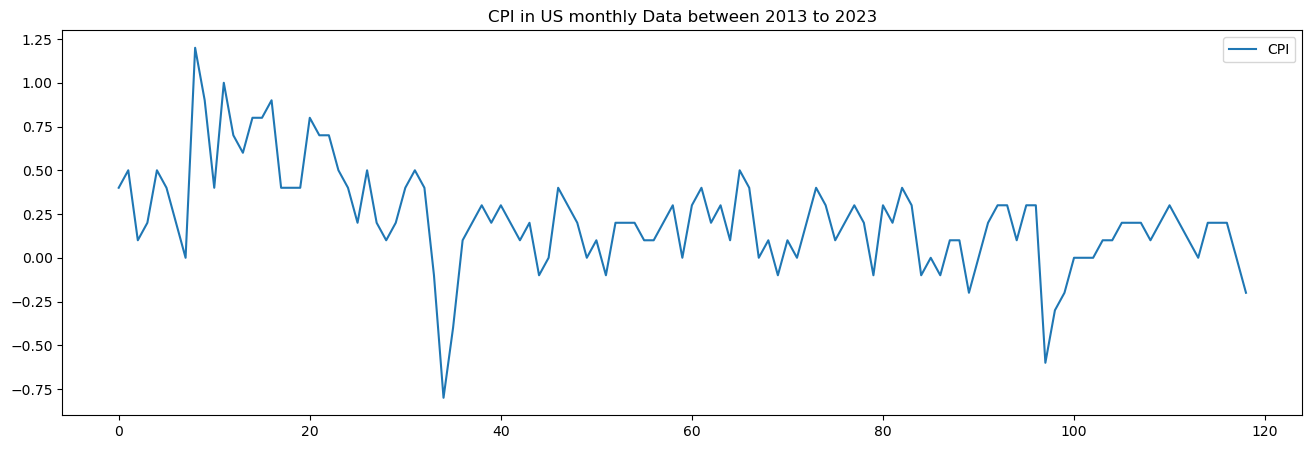

In [34]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['CPI'], label = "CPI")
plt.legend(loc='best')
plt.title("CPI in US monthly Data between 2013 to 2023")
plt.show()

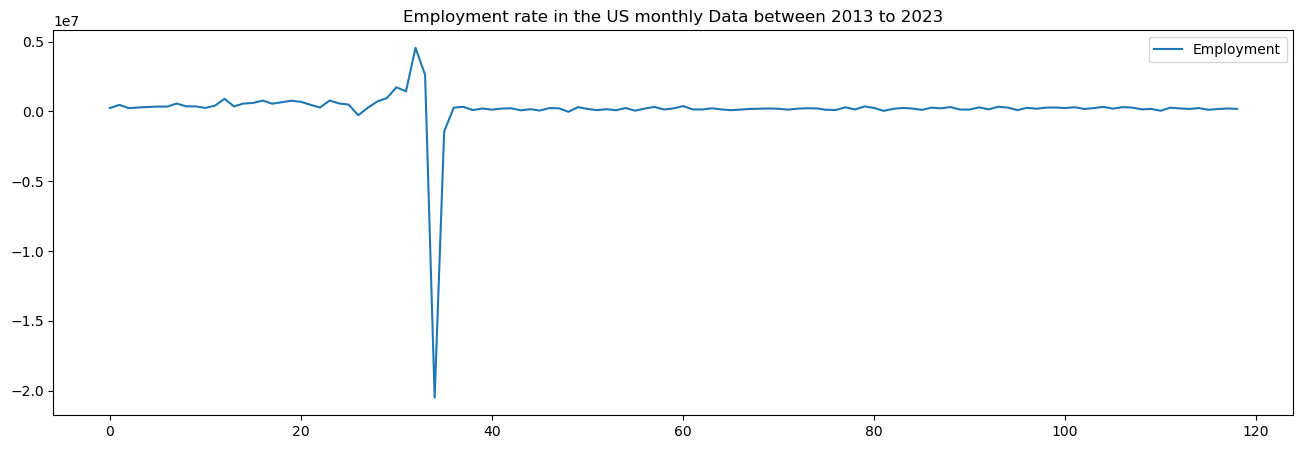

In [35]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['EMP_US'], label = "Employment")
plt.legend(loc='best')
plt.title("Employment rate in the US monthly Data between 2013 to 2023")
plt.show()

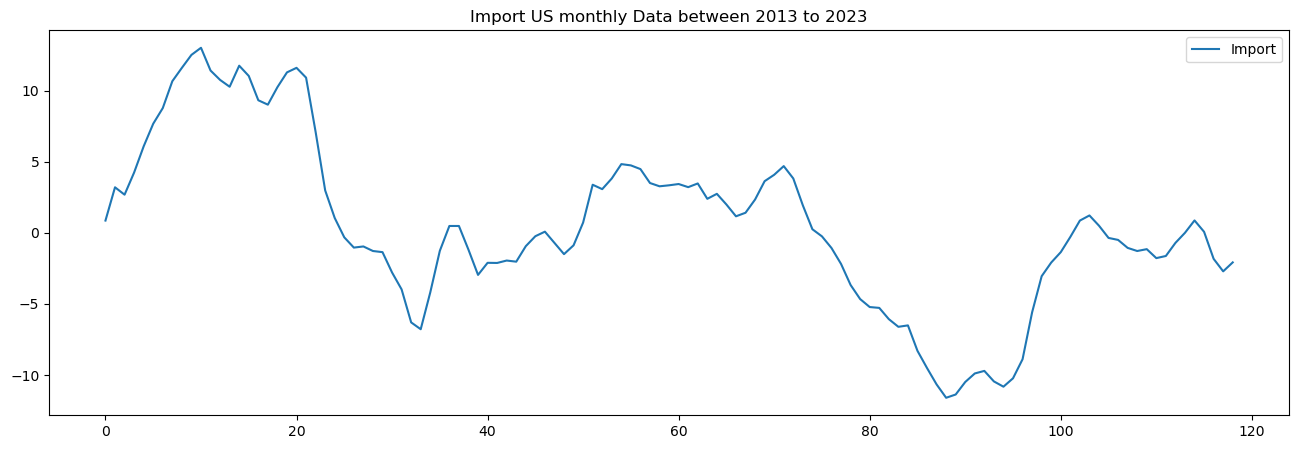

In [36]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['Import in P. US'], label = "Import")
plt.legend(loc='best')
plt.title("Import US monthly Data between 2013 to 2023")
plt.show()

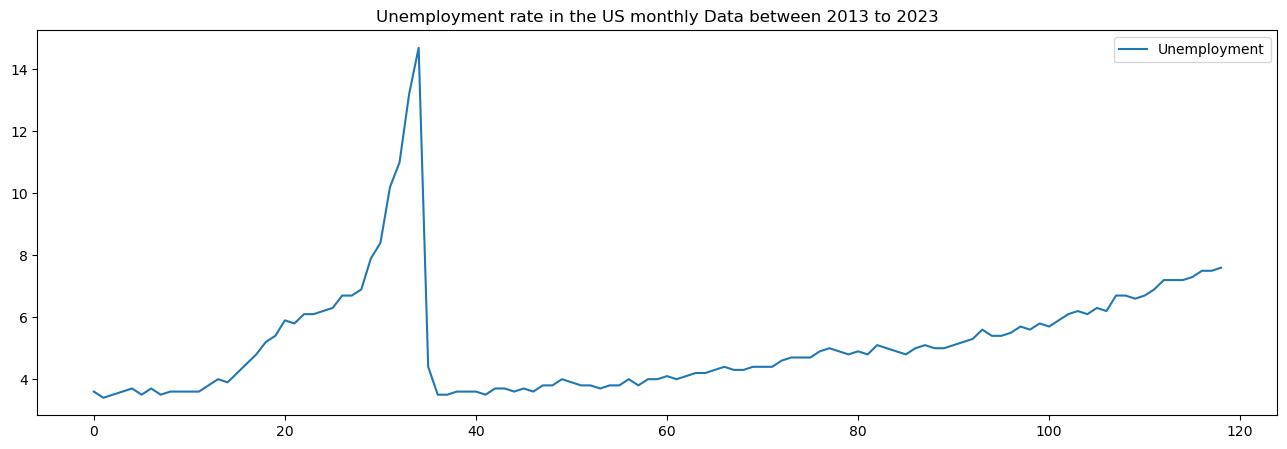

In [37]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['UNEMP_US'], label = "Unemployment")
plt.legend(loc='best')
plt.title("Unemployment rate in the US monthly Data between 2013 to 2023")
plt.show()

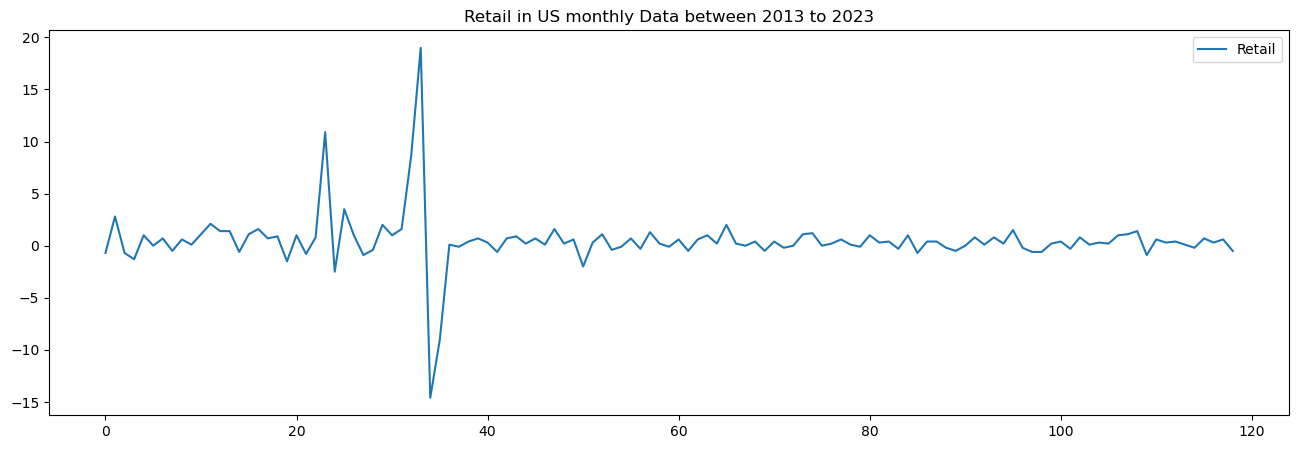

In [38]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['Retail'], label = "Retail")
plt.legend(loc='best')
plt.title("Retail in US monthly Data between 2013 to 2023")
plt.show()

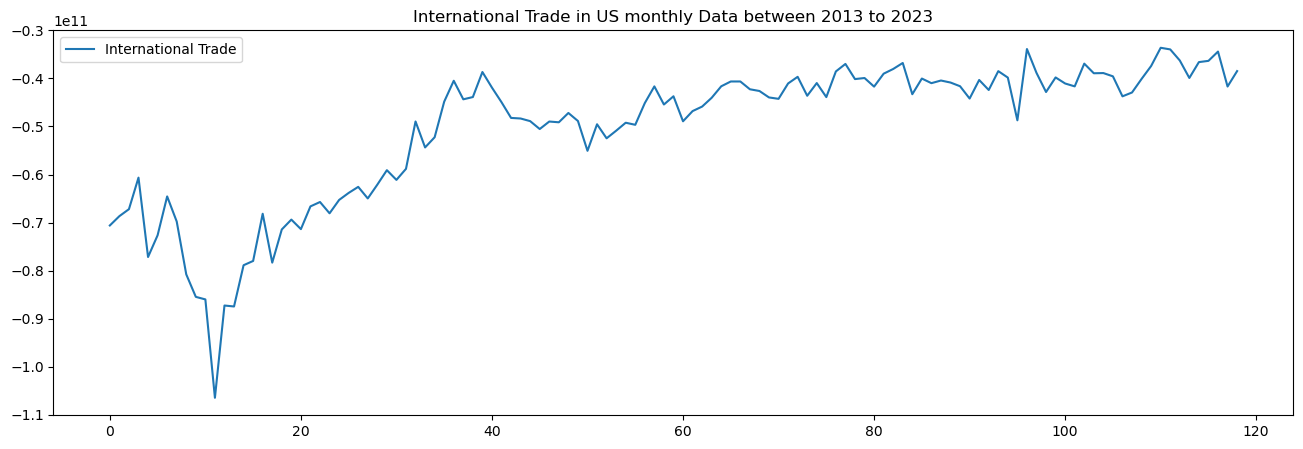

In [39]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['INT. TRADE'], label = "International Trade")
plt.legend(loc='best')
plt.title("International Trade in US monthly Data between 2013 to 2023")
plt.show()

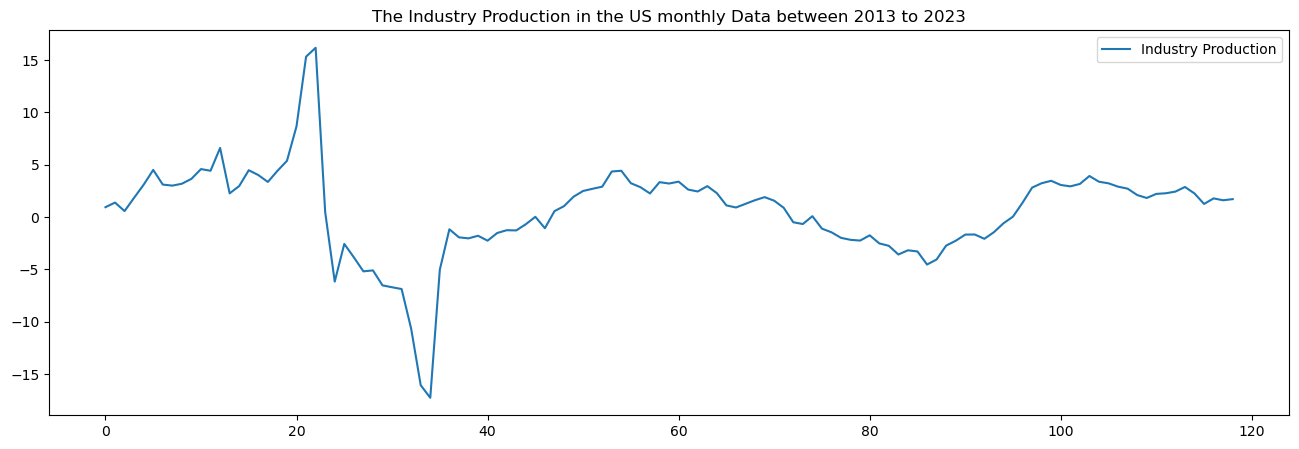

In [40]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['INDST_Prod'], label = "Industry Production")
plt.legend(loc='best')
plt.title("The Industry Production in the US monthly Data between 2013 to 2023")
plt.show()

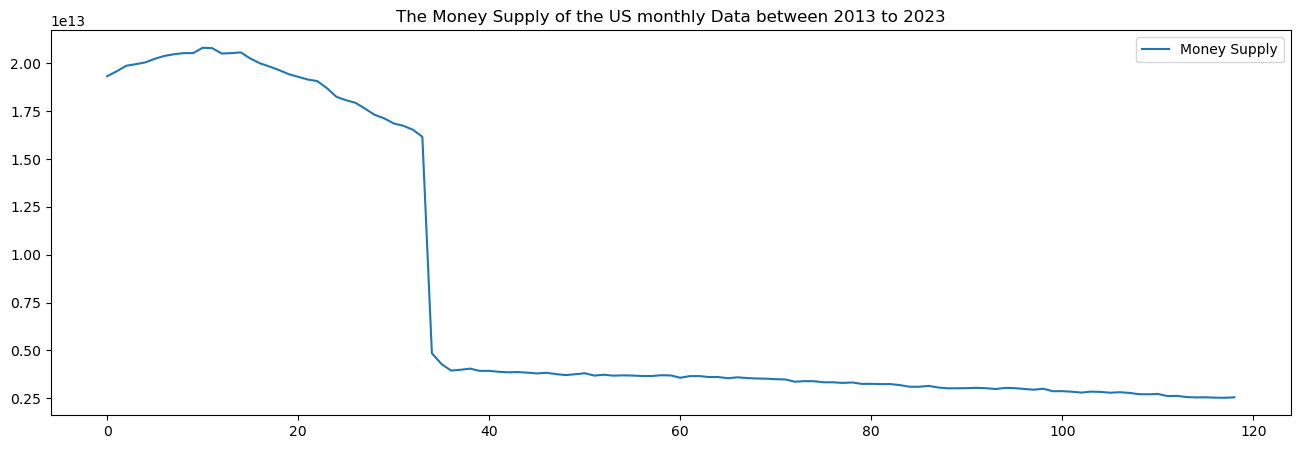

In [41]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['MONEY SUPPLY'], label = "Money Supply")
plt.legend(loc='best')
plt.title("The Money Supply of the US monthly Data between 2013 to 2023")
plt.show()

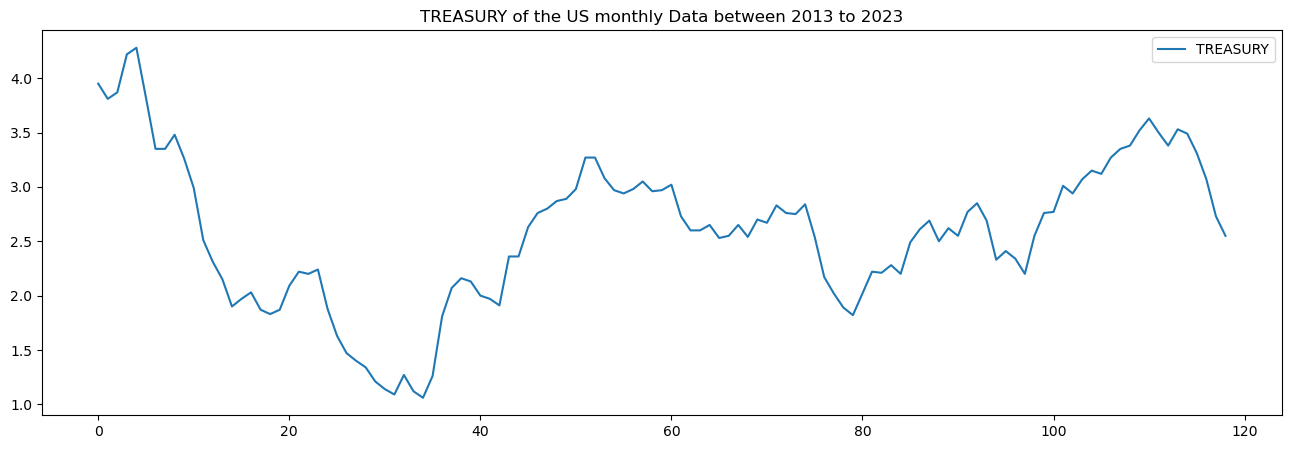

In [42]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['TREASURY'], label = "TREASURY")
plt.legend(loc='best')
plt.title("TREASURY of the US monthly Data between 2013 to 2023")
plt.show()

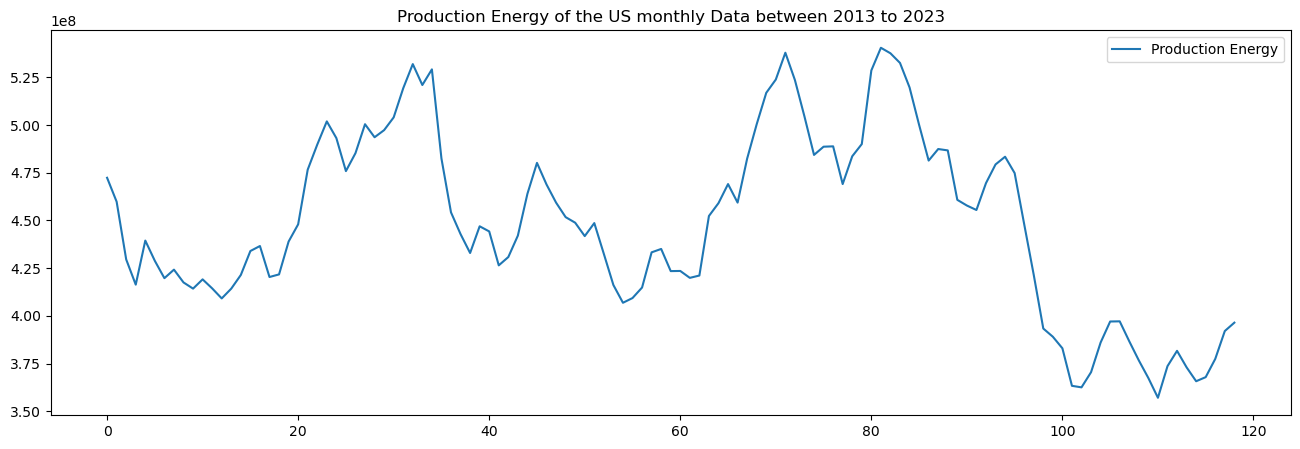

In [43]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['PROD_Energy'], label = "Production Energy")
plt.legend(loc='best')
plt.title("Production Energy of the US monthly Data between 2013 to 2023")
plt.show()

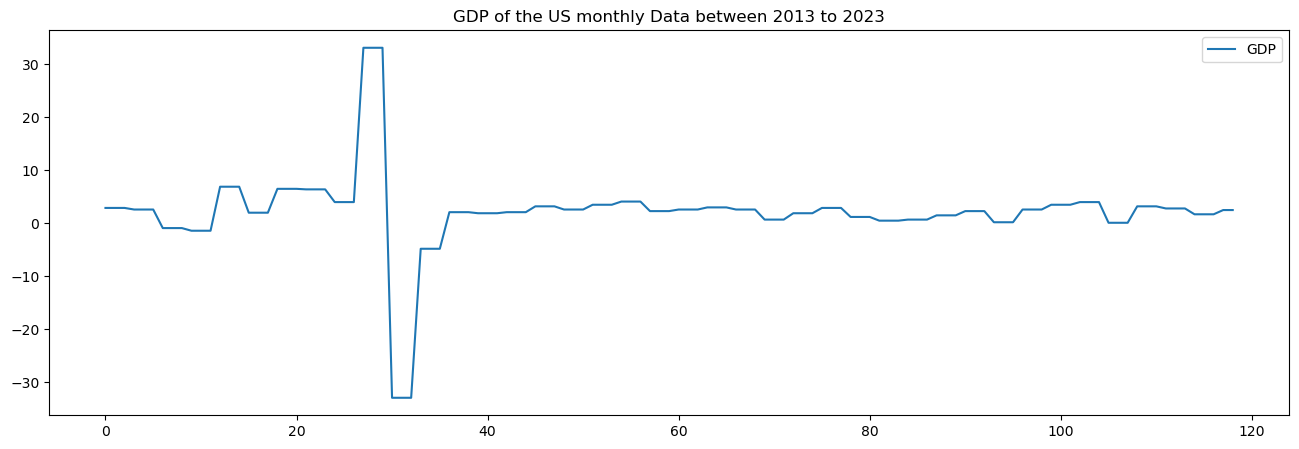

In [44]:
plt.figure(figsize=(16,5))
plt.plot(df2.index, df2['GDP'], label = "GDP")
plt.legend(loc='best')
plt.title("GDP of the US monthly Data between 2013 to 2023")
plt.show()

Based on plots 'Retail', CPI, EMP_US looks stationary. Non-stationary time series is said to have a «Unit root», i.e. to follow a stochastic process, if the observations along the time series are related to past observations. This can be seen for the remaining time series.

# Augmented Dickey-Fuller (ADF) 

H0: the time series has a unit root (i.e. associated with non-stionary data)
H1: the times series is higly likely to lack a unit root and thus can be considered as associated with stationary data.

In [247]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print('\t%s: %.3f' % (key, value))
        if dftest[0] < dftest[4]["5%"]:
            print ("Reject Ho - Time Series is Stationary")
        else:
            print ("Failed to Reject Ho - Time Series is Non-Stationary")
    print (dfoutput)

In [248]:
# Call the function and run the test
adf_test(df['Stoxx'])
adf_test(df['S&P 500'])
adf_test(df['Dow Jones Industria'])
adf_test(df['Bovespa Index'])
adf_test(df['Russell 2000'])
adf_test(df['FTSE 100'])
adf_test(df['Hang Seng Index'])
adf_test(df['NASDAQ-100'])
adf_test(df['DAX '])
adf_test(df['CAC 40'])
#Interpretation: 
#The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values

Results of Dickey-Fuller Test:
	1%: -3.487
Failed to Reject Ho - Time Series is Non-Stationary
	5%: -2.886
Failed to Reject Ho - Time Series is Non-Stationary
	10%: -2.580
Failed to Reject Ho - Time Series is Non-Stationary
Test Statistic                  -2.435275
p-value                          0.132027
#Lags Used                       0.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Results of Dickey-Fuller Test:
	1%: -3.491
Failed to Reject Ho - Time Series is Non-Stationary
	5%: -2.888
Failed to Reject Ho - Time Series is Non-Stationary
	10%: -2.581
Failed to Reject Ho - Time Series is Non-Stationary
Test Statistic                  -1.089558
p-value                          0.719218
#Lags Used                       7.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -

Since critical value -2.435275>-3.487022,-2.886363,-2.580009 (t-values at 1%,5%and 10% confidence intervals), null hypothesis cannot be rejected. So there is non stationarity in your data. Also all p-value of are greater than 0.05(if we take 5% significance level or 95% confidence interval), null hypothesis cannot be rejected. All time series are non-stationary. 

In [249]:
adf_test(df2['CPI'])
adf_test(df2['EMP_US'])
adf_test(df2['Import in P. US'])
adf_test(df2['UNEMP_US'])
adf_test(df2['Retail'])
adf_test(df2['INT. TRADE'])#stationär
adf_test(df2['INDST_Prod'])
adf_test(df2['MONEY SUPPLY'])#stationär
adf_test(df2['TREASURY'])#stationär
adf_test(df2['PROD_Energy'])
adf_test(df2['GDP'])

Results of Dickey-Fuller Test:
	1%: -3.487
Reject Ho - Time Series is Stationary
	5%: -2.886
Reject Ho - Time Series is Stationary
	10%: -2.580
Reject Ho - Time Series is Stationary
Test Statistic                  -5.339084
p-value                          0.000005
#Lags Used                       0.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Results of Dickey-Fuller Test:
	1%: -3.488
Reject Ho - Time Series is Stationary
	5%: -2.887
Reject Ho - Time Series is Stationary
	10%: -2.580
Reject Ho - Time Series is Stationary
Test Statistic                -8.994744e+00
p-value                        6.742045e-15
#Lags Used                     1.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64
Resu

# Phillips-Perron test
The Phillips-Perron test is similar to the ADF except that the regression run does not include lagged values of the first differences. Instead, the PP test fixed the t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator. The non-parametric Phillips-Perron test transforms t-statistic to further account for autocorrelation and 
heteroscedasticity effects.

In [94]:
pip install arch

     ------------------------------------ 853.2/853.2 kB 473.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [100]:
from arch.unitroot import PhillipsPerron

In [250]:
pp = PhillipsPerron(df['Stoxx'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['S&P 500'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['Dow Jones Industria'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['Bovespa Index'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['Russell 2000'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['FTSE 100'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['Hang Seng Index'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['NASDAQ-100'])
print(pp.summary().as_text())

pp = PhillipsPerron(df['DAX '])
print(pp.summary().as_text())

pp = PhillipsPerron(df['CAC 40'])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.650
P-value                         0.083
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.728
P-value                         0.839
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.790
P-value                         0.822
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Nu

In [102]:
pp = PhillipsPerron(df2['CPI'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['EMP_US'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['Import in P. US'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['UNEMP_US'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['Retail'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['INT. TRADE'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['INDST_Prod'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['MONEY SUPPLY'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['TREASURY'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['PROD_Energy'])
print(pp.summary().as_text())

pp = PhillipsPerron(df2['GDP'])
print(pp.summary().as_text())


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.129
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -11.230
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.880
P-value                         0.341
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Nu

# Granger Causality Test

In [373]:
from statsmodels.tsa.stattools import grangercausalitytests
#Variable=list(Indices.columns)
print(grangercausalitytests(Indices[['Stoxx', 'S&P 500']], maxlag=4))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6324  , p=0.2039  , df_denom=117, df_num=1
ssr based chi2 test:   chi2=1.6742  , p=0.1957  , df=1
likelihood ratio test: chi2=1.6626  , p=0.1972  , df=1
parameter F test:         F=1.6324  , p=0.2039  , df_denom=117, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5691  , p=0.0314  , df_denom=114, df_num=2
ssr based chi2 test:   chi2=7.4512  , p=0.0241  , df=2
likelihood ratio test: chi2=7.2272  , p=0.0270  , df=2
parameter F test:         F=3.5691  , p=0.0314  , df_denom=114, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4573  , p=0.0189  , df_denom=111, df_num=3
ssr based chi2 test:   chi2=11.0260 , p=0.0116  , df=3
likelihood ratio test: chi2=10.5409 , p=0.0145  , df=3
parameter F test:         F=3.4573  , p=0.0189  , df_denom=111, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4887  , p=0.0475  

# Creating different Combinations of macroeconomic variables with Indices

For each asset return create a loop where you:
o Test at least 5 multivariate OLS models using different combinations of 
macroeconomic variables. Save all the results into a table.
o Chose the most promising regressions and 
o For each regression run the Chow test in the middle of the sample and verify 
whether the model is stable or not. Save all the results into a table.
o Run the rolling window regressions to see whether the Betas are stable over 
time
Analyze.


In [284]:
#NAME OF COL
#Index=['Stoxx', 'S&P 500', 'Dow Jones Industria', 'Bovespa Index','Russell 2000', 'FTSE 100', 'Hang Seng Index', 'NASDAQ-100','DAX ', 'CAC 40']
#Macro=['CPI', 'EMP_US', 'Import in P. US', 'UNEMP_US', 'Retail','INT. TRADE', 'INDST_Prod', 'MONEY SUPPLY', 'TREASURY','PROD_Energy']

# SIMULATION ONLY WITH STOXX

In [301]:
import itertools as it
#r-length tuples, in sorted order, no repeated elements with 5 combinations
Indices_Stoxx = [x for x in it.combinations(['Stoxx','CPI', 'EMP_US', 'Import in P. US', 'UNEMP_US', 'Retail',
       'INT. TRADE', 'INDST_Prod', 'MONEY SUPPLY', 'TREASURY',
       'PROD_Energy','GDP'],5)]

In [286]:
len(Indices_Stoxx)

792

In [287]:
#get a list of combinations
Indices_Stoxx

[('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'UNEMP_US'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'Retail'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'INT. TRADE'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'INDST_Prod'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'MONEY SUPPLY'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'TREASURY'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'PROD_Energy'),
 ('Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'GDP'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'Retail'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'INT. TRADE'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'INDST_Prod'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'MONEY SUPPLY'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'TREASURY'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'PROD_Energy'),
 ('Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'GDP'),
 ('Stoxx', 'CPI', 'EMP_US', 'Retail', 'INT. TRADE'),
 ('Stoxx', 'CPI', 'EMP_US', 'Retail', 'INDST_Prod'),
 ('Stoxx', 'CPI', 'EMP_US', 'Retail

In [288]:
f = pd.DataFrame(Indices_Stoxx, columns=['y','x1','x2','x3','x4'])
f

,y,x1,x2,x3,x4
0,Stoxx,CPI,EMP_US,Import in P. US,UNEMP_US
1,Stoxx,CPI,EMP_US,Import in P. US,Retail
2,Stoxx,CPI,EMP_US,Import in P. US,INT. TRADE
3,Stoxx,CPI,EMP_US,Import in P. US,INDST_Prod
4,Stoxx,CPI,EMP_US,Import in P. US,MONEY SUPPLY
...,...,...,...,...,...
787,INT. TRADE,INDST_Prod,MONEY SUPPLY,TREASURY,GDP
788,INT. TRADE,INDST_Prod,MONEY SUPPLY,PROD_Energy,GDP
789,INT. TRADE,INDST_Prod,TREASURY,PROD_Energy,GDP
790,INT. TRADE,MONEY SUPPLY,TREASURY,PROD_Energy,GDP


In [289]:
contain_values = f[f['y'].str.contains('Stoxx')]
print (contain_values)

         y            x1            x2               x3            x4
0    Stoxx           CPI        EMP_US  Import in P. US      UNEMP_US
1    Stoxx           CPI        EMP_US  Import in P. US        Retail
2    Stoxx           CPI        EMP_US  Import in P. US    INT. TRADE
3    Stoxx           CPI        EMP_US  Import in P. US    INDST_Prod
4    Stoxx           CPI        EMP_US  Import in P. US  MONEY SUPPLY
..     ...           ...           ...              ...           ...
325  Stoxx    INDST_Prod  MONEY SUPPLY         TREASURY   PROD_Energy
326  Stoxx    INDST_Prod  MONEY SUPPLY         TREASURY           GDP
327  Stoxx    INDST_Prod  MONEY SUPPLY      PROD_Energy           GDP
328  Stoxx    INDST_Prod      TREASURY      PROD_Energy           GDP
329  Stoxx  MONEY SUPPLY      TREASURY      PROD_Energy           GDP

[330 rows x 5 columns]


In [290]:
#selects n numbers of rows randomly
OLS_multi=contain_values.sample(n=10)

In [291]:
np.array(OLS_multi)

array([['Stoxx', 'UNEMP_US', 'INT. TRADE', 'MONEY SUPPLY', 'TREASURY'],
       ['Stoxx', 'CPI', 'Import in P. US', 'UNEMP_US', 'TREASURY'],
       ['Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'TREASURY'],
       ['Stoxx', 'Retail', 'INT. TRADE', 'INDST_Prod', 'MONEY SUPPLY'],
       ['Stoxx', 'EMP_US', 'UNEMP_US', 'INT. TRADE', 'INDST_Prod'],
       ['Stoxx', 'INDST_Prod', 'MONEY SUPPLY', 'TREASURY', 'GDP'],
       ['Stoxx', 'EMP_US', 'Import in P. US', 'PROD_Energy', 'GDP'],
       ['Stoxx', 'CPI', 'EMP_US', 'UNEMP_US', 'MONEY SUPPLY'],
       ['Stoxx', 'CPI', 'EMP_US', 'Import in P. US', 'UNEMP_US'],
       ['Stoxx', 'CPI', 'EMP_US', 'Retail', 'MONEY SUPPLY']], dtype=object)

# Preparing for Multivariate OLS

In [292]:
Stoxx_multi_OLS_1 = df2[[ 'Retail', 'INT. TRADE', 'MONEY SUPPLY', 'TREASURY']]
Stoxx_multi_OLS_2= df2[['EMP_US', 'UNEMP_US', 'Retail', 'PROD_Energy']]
Stoxx_multi_OLS_3=df2[['CPI', 'INT. TRADE', 'INDST_Prod', 'MONEY SUPPLY']]
Stoxx_multi_OLS_4=df2[['CPI', 'INT. TRADE', 'MONEY SUPPLY', 'TREASURY']]
Stoxx_multi_OLS_5=df2[['Import in P. US', 'UNEMP_US', 'PROD_Energy', 'GDP']]
Stoxx_multi_OLS_6=df2[['EMP_US', 'Retail', 'INDST_Prod', 'GDP']]
Stoxx_multi_OLS_7=df2[['CPI', 'Retail', 'INDST_Prod', 'GDP']]
Stoxx_multi_OLS_8=df2[['EMP_US', 'Import in P. US', 'UNEMP_US', 'GDP']]
Stoxx_multi_OLS_9=df2[['CPI', 'UNEMP_US', 'MONEY SUPPLY', 'PROD_Energy']]
Stoxx_multi_OLS_10=df2[['Import in P. US', 'INT. TRADE', 'MONEY SUPPLY','PROD_Energy']]

# Performing multivariate OLS

In [302]:
Indices[['Stoxx']]

,Stoxx
0,514.237856
1,496.255108
2,487.668422
3,492.277112
4,454.719606
...,...
116,393.056859
117,398.441241
118,370.752901
119,390.991904


In [303]:
X=Stoxx_multi_OLS_1.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_2.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_3.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_4.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_5.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_6.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_7.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_8.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_9.join(Indices[['Stoxx']])
#X=Stoxx_multi_OLS_10.join(Indices[['Stoxx']])


In [304]:
Stoxx=X[['Stoxx']]
X.drop(['Stoxx'], inplace=True, axis=1)

In [305]:
#OLS overfull periode
y_target=Stoxx
X = sm.add_constant(X)

In [306]:
model = sm.OLS(y_target, X, missing='drop').fit()
print(model.summary2())
RSS_full = sum(model.resid ** 2)
RSS_full

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.341    
Dependent Variable: Stoxx            AIC:                1206.4123
Date:               2023-06-03 13:56 BIC:                1220.3079
No. Observations:   119              Log-Likelihood:     -598.21  
Df Model:           4                F-statistic:        16.26    
Df Residuals:       114              Prob (F-statistic): 1.45e-10 
R-squared:          0.363            Scale:              1420.7   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
const           396.9449  24.3789 16.2823 0.0000 348.6504 445.2394
Retail            0.1730   1.2994  0.1331 0.8943  -2.4012   2.7471
INT. TRADE        0.0000   0.0000  0.0084 0.9934  -0.0000   0.0000
MONEY SUPPLY      0.0000   0.0000  3.1987 0.0018   0.0000   0.0000
TREASURY     

161964.2546485044

In [307]:
results=model.summary2()

# Save results in a table

In [308]:
LRresult = (model.summary2().tables[1])
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,3.969449e+02,2.437894e+01,16.282286,1.593611e-31,3.486504e+02,4.452394e+02
Retail,1.729729e-01,1.299436e+00,0.133114,8.943380e-01,-2.401200e+00,2.747146e+00
INT. TRADE,4.931150e-12,5.904634e-10,0.008351,9.933513e-01,-1.164772e-09,1.174635e-09
MONEY SUPPLY,3.896298e-12,1.218082e-12,3.198714,1.787594e-03,1.483286e-12,6.309310e-12
TREASURY,4.980142e+00,5.175724e+00,0.962212,3.379798e-01,-5.272927e+00,1.523321e+01


# Chose the most promising regressions  

In [309]:
print('R2: ', model.rsquared)

R2:  0.36329986519008106


# run the chow test for each regression

Check for better understanding: https://lifewithdata.com/2023/06/02/how-to-perform-a-chow-test-in-python/

In [76]:
#pip install chowtest

Note: you may need to restart the kernel to use updated packages.


In [312]:
# creates a list of all the variables of interest
# creates a new dataframe containing only the variables of interest
#my_data=Stoxx_multi_OLS_1.join(Indices[['Stoxx']])

In [313]:
#imports the chowtest package as ct, which is written by yours truly
import chow_test

In [314]:
# Fit the model for the first subset
X1 = sm.add_constant(X[:60])
model_1 = sm.OLS(Stoxx[:60], X1,missing='drop').fit()
print(model_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.322   
Dependent Variable: Stoxx            AIC:                623.1530
Date:               2023-06-03 13:56 BIC:                633.6247
No. Observations:   60               Log-Likelihood:     -306.58 
Df Model:           4                F-statistic:        8.009   
Df Residuals:       55               Prob (F-statistic): 3.67e-05
R-squared:          0.368            Scale:              1751.7  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          424.3155  32.0125 13.2547 0.0000 360.1611 488.4699
Retail          -0.1713   1.4695 -0.1166 0.9076  -3.1161   2.7736
INT. TRADE       0.0000   0.0000  0.1113 0.9118  -0.0000   0.0000
MONEY SUPPLY     0.0000   0.0000  2.8280 0.0065   0.0000   0.0000
TREASURY        -5.3114   6

In [315]:
# Fit the model for the second subset
X2 = sm.add_constant(X[60:119])
model_2 = sm.OLS(Stoxx[60:119], X2,missing='drop').fit()
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.475   
Dependent Variable: Stoxx            AIC:                549.2687
Date:               2023-06-03 13:56 BIC:                559.6564
No. Observations:   59               Log-Likelihood:     -269.63 
Df Model:           4                F-statistic:        14.09   
Df Residuals:       54               Prob (F-statistic): 6.12e-08
R-squared:          0.511            Scale:              596.35  
-----------------------------------------------------------------
                 Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const           59.3540  57.5891  1.0306 0.3073 -56.1052 174.8131
Retail           0.9173   5.5759  0.1645 0.8699 -10.2617  12.0962
INT. TRADE      -0.0000   0.0000 -1.1912 0.2388  -0.0000   0.0000
MONEY SUPPLY     0.0000   0.0000  3.2659 0.0019   0.0000   0.0000
TREASURY        63.5107   8

In [316]:
RSS_1 = sum(model_1.resid ** 2)
print(RSS_1)
RSS_2 = sum(model_2.resid ** 2)
print(RSS_2)

96344.38833564827
32202.766909000224


# First calculate the residual sum of squares (RSS) for each model then calculate the Chow test statistic using these RSS values

In [317]:
# Calculate the Chow test statistic
numerator = ((RSS_full - (RSS_1 + RSS_2)) / 4)
denominator = ((RSS_1 + RSS_2) / 119)
chow_stat = numerator / denominator

# calculate the p-value using the cumulative distribution function (CDF) of the F-distribution

In [318]:
p_value = 1 - stats.f.cdf(chow_stat, 4, 119)
p_value

1.4185744435568637e-05

In [319]:
# Print the results
print('Chow Test Statistic:', chow_stat)
print('p-value:', p_value)

Chow Test Statistic: 7.733805585760725
p-value: 1.4185744435568637e-05


In [321]:
from statsmodels.regression.rolling import RollingOLS
rols = RollingOLS(y_target, X, window=10, missing='drop')
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()

,const,Retail,INT. TRADE,MONEY SUPPLY,TREASURY
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [322]:
params.iloc[10:119]

,const,Retail,INT. TRADE,MONEY SUPPLY,TREASURY
11,2986.641252,-11.005480,-2.614430e-09,-1.332727e-10,-7.741269
12,3418.560109,-11.101150,-3.097853e-09,-1.540522e-10,-20.079070
13,3970.954056,-12.236133,-3.195646e-09,-1.796041e-10,-30.729528
14,3515.511285,3.620564,-2.532948e-09,-1.547219e-10,-34.823802
15,3889.685590,-8.060038,-2.815086e-09,-1.714853e-10,-48.626317
...,...,...,...,...,...
115,-98.555148,4.339682,-1.032512e-09,1.238966e-10,52.629795
116,-196.739714,2.567100,-1.232790e-09,1.462372e-10,61.671984
117,-294.156248,3.278568,-1.843186e-09,1.542906e-10,77.051463
118,-353.284732,2.976661,-2.802848e-09,1.838022e-10,61.812024


In [335]:
#pip install pandas-datareader

     ------------------------------------ 109.5/109.5 kB 902.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [336]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

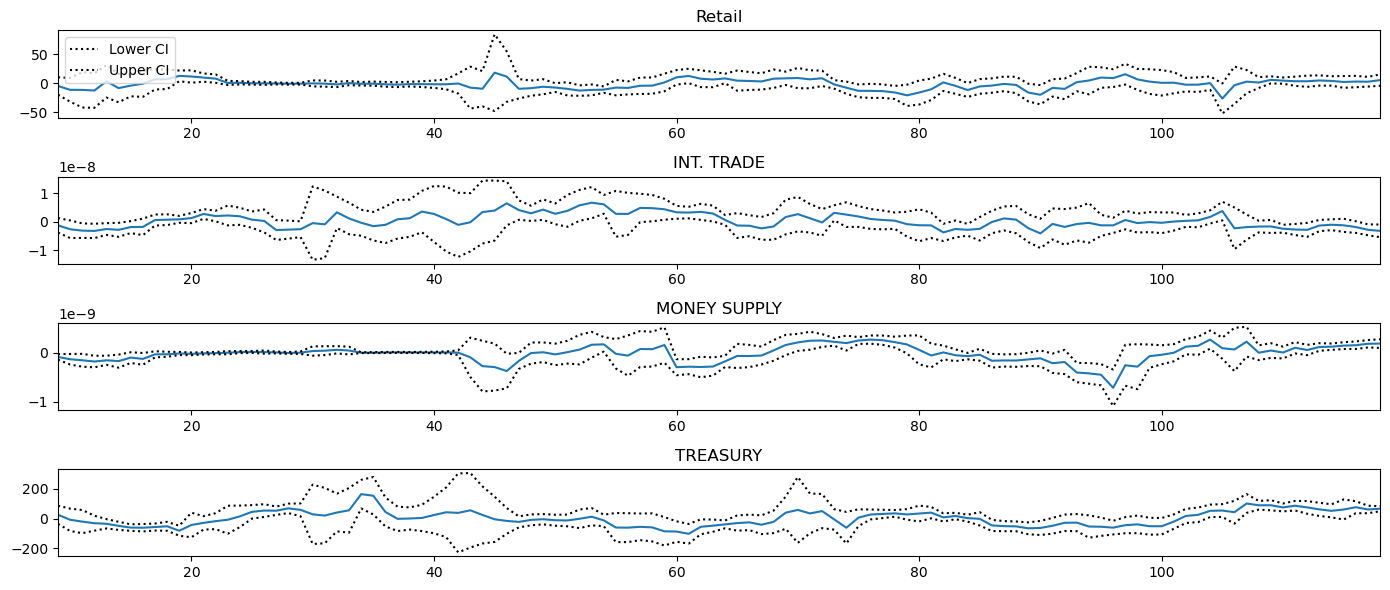

In [341]:
#X.reset_index(drop=True)
X=list(X.columns)
fig = rres.plot_recursive_coefficient(variables=X, figsize=(14, 6))